In [1]:
'''
【课程3.4.2】  PCA主成分分析的python实现方法
'''

'\n【课程3.4.2】  PCA主成分分析的python实现方法\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

         X1        X2
0 -1.174787 -1.404131
1 -1.374449 -1.294660
2 -2.316007 -2.166109
3  0.947847  1.460480
4  1.762375  1.640622
(200, 2)


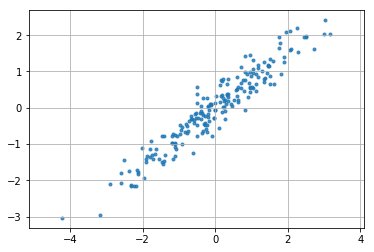

In [3]:
# 二维数据降维


rng = np.random.RandomState(8)                    
data = np.dot(rng.rand(2,2),rng.randn(2,200)).T

df = pd.DataFrame({'X1':data[:,0],        # 数据创建
                   'X2':data[:,1]})
print(df.head())
print(df.shape)
plt.scatter(df['X1'],df['X2'],alpha=0.8,marker='.')
plt.axis('equal')                         # 生成图表
plt.grid()

[ 2.79699086]
[[-0.7788006  -0.62727158]]
1
original shape: (200, 2)
transformed shape: (200, 1)
[[ 1.77885258]
 [ 1.8656813 ]
 [ 3.14560277]
 [-1.67114513]
 [-2.41849842]]


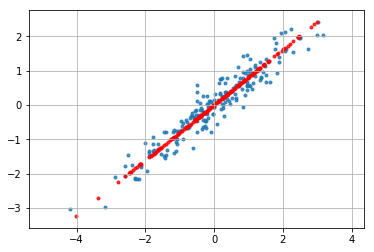

In [4]:
# 二维数据降维
# 构建模型，分析主成分

from sklearn.decomposition import PCA  # 加载主成分分析模块PCA

pca = PCA(n_components=1)              # n_components = 1 → 降为1维
pca.fit(df)                            # 构建模型

'''
 sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)  
 n_components:  PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
 copy: True或者False，默认为True → 表示是否在运行算法时，将原始训练数据复制一份
 fit(X,y=None) → 调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练

'''

print(pca.explained_variance_)       # 输出特征值
print(pca.components_)               # 输出特征向量
print(pca.n_components_)             # 输出成分的个数
'''
 components_：返回具有最大方差的成分。
 explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
 n_components_：返回所保留的成分个数n。

 这里是shape(200,2)降为shape(200,1)，只有1个特征值，对应2个特征向量
 降维后主成分 A1 = 0.7788006 * X1 + 0.62727158 * X2

'''
x_pca = pca.transform(df)              # 数据转换  
x_new = pca.inverse_transform(x_pca)   # 将降维后的数据转换成原始数据
print('original shape:',df.shape)
print('transformed shape:',x_pca.shape)
print(x_pca[:5])
'''
 主成分分析，生成新的向量x_pca
 fit_transform(X) → 用X来训练PCA模型，同时返回降维后的数据，这里x_pca就是降维后的数据
 inverse_transform() → 将降维后的数据转换成原始数据

'''
plt.scatter(df['X1'],df['X2'],marker='.',alpha=0.8)
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8,marker='.',color='r')
plt.axis('equal')
plt.grid()

In [5]:
# 多维数据降维 
# 加载数据

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
print(f"数据长度是:{len(digits['data'])}")
print(f"数据形状为:{digits.data.shape}")
print(digits.data[:2])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度是:1797
数据形状为:(1797, 64)
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]


original shape: (1797, 64)
transformed shape: (1797, 2)
[ 179.0069301   163.71774688]
(2, 64)


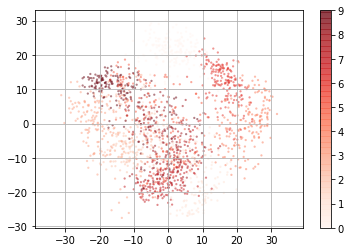

In [9]:
# 多维数据降维 
# 构建模型，分析主成分

pca = PCA(n_components=2 )                 # 降为2纬
projected = pca.fit_transform(digits.data)
print('original shape:',digits.data.shape) 
print('transformed shape:',projected.shape)
print(pca.explained_variance_)             # 输出特征值
print(pca.components_.shape)               # 输出特征向量形状
                                           # 降维后，得到2个成分，每个成分有64个特征向量
plt.scatter(projected[:,0],projected[:,1],
           c = digits.target,edgecolor='none',
           alpha=0.5,cmap='Reds',s=5)
plt.axis('equal')
plt.grid()
plt.colorbar()

original shape: (1797, 64)
transformed shape: (1797, 10)
[ 179.0069301   163.71774688  141.78843909  101.1003749    69.51316193
   59.1085125    51.88445427   44.01500863   40.31079686   37.01174797]
(10, 64)
            b     b_sum
0  179.006930  0.201708
1  163.717747  0.386187
2  141.788439  0.545957
3  101.100375  0.659878
4   69.513162  0.738206


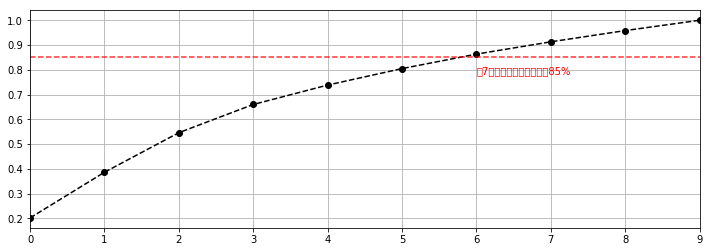

In [8]:
# 多维数据降维 
# 主成分筛选

pca = PCA(n_components=10)                     # 降为10纬
projected = pca.fit_transform(digits.data)  
print('original shape:',digits.data.shape) 
print('transformed shape:',projected.shape)
print(pca.explained_variance_)             # 输出特征值
print(pca.components_.shape)               # 输出特征向量形状
                                           # 降维后，得到10个成分，每个成分有64个特征向量
c_s = pd.DataFrame({'b':pca.explained_variance_,
                    'b_sum':pca.explained_variance_.cumsum()/pca.explained_variance_.sum()})
print(c_s.head())                          # 做贡献率累计求和
c_s['b_sum'].plot(style='--ko',figsize=(12,4))
plt.axhline(0.85,hold=None,color='r',linestyle='--',alpha=0.8)
plt.text(6,c_s['b_sum'].iloc[6]-0.08,'第7个成分累计贡献率超过85%',color='r')
plt.grid()